In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from skimage.io import imshow
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [6]:
olive = datasets.fetch_olivetti_faces()
olive

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [7]:
data = olive.data
images = olive.images
target = olive.target
print(data.shape,images.shape,target.shape)

(400, 4096) (400, 64, 64) (400,)


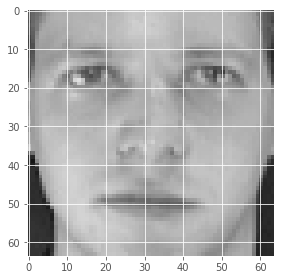

In [8]:
imshow(images[0])

In [9]:
#data_img=images.reshape(images.shape[0], images.shape[1] * images.shape[2]) 

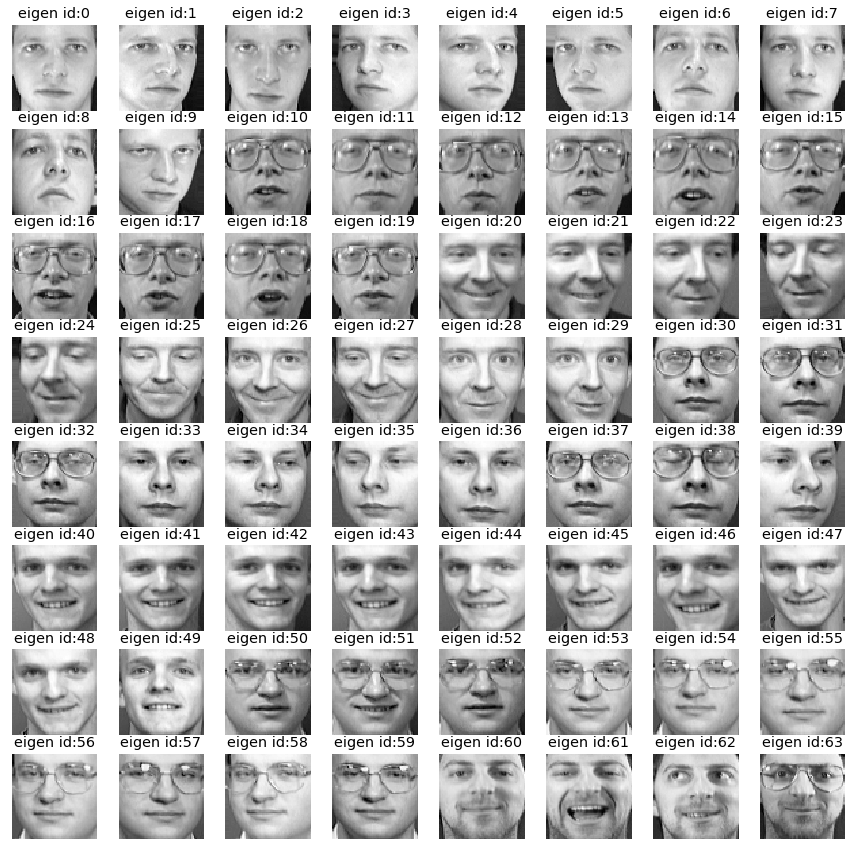

In [10]:
j=0;
fig,axarr = plt.subplots(nrows=8, ncols=8, figsize=(15,15))
axarr=axarr.flatten()
for i in range(len(images)):
    if(i>=64):
        break
    axarr[i].imshow(images[i],cmap='gray')
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))


In [11]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [12]:
def show_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    length = len(unique_ids)
    te="There are "+str(length)+" distinct people in the dataset"
    plt.suptitle(t=te)

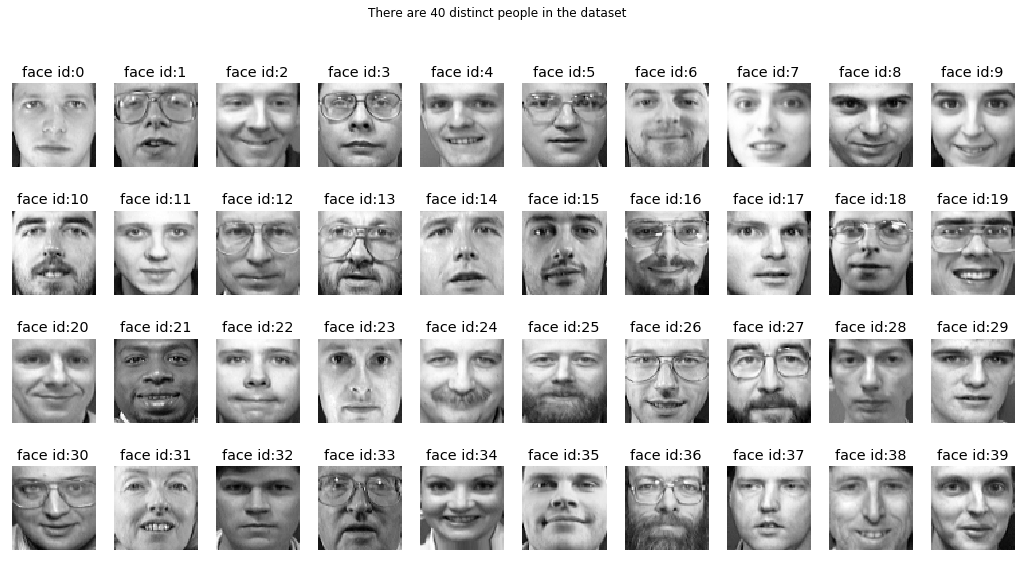

In [13]:
show_distinct_people(images,np.unique(target))

In [14]:
X=images.reshape((images.shape[0],images.shape[1]*images.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [15]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


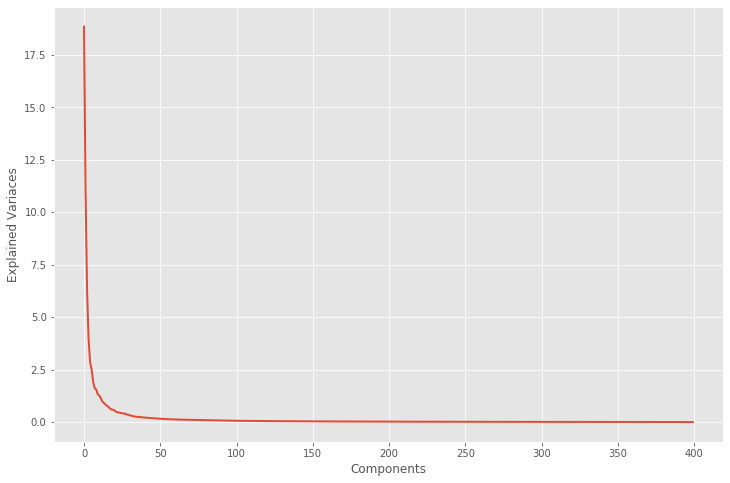

In [16]:
pca=PCA()
pca.fit(X)
plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [17]:
n_components=90

In [18]:
def n_components_function(n):
    pca=PCA(n_components=n, whiten=True)
    pca.fit(X_train)
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)
    number_of_eigenfaces=len(pca.components_)
    eigen_faces=pca.components_.reshape((number_of_eigenfaces, images.shape[1], images.shape[2]))
    cols=10
    rows=int(number_of_eigenfaces/cols)
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
    axarr=axarr.flatten()
    for i in range(number_of_eigenfaces):
        axarr[i].imshow(eigen_faces[i], cmap='gray')
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        axarr[i].set_title("eigen id:{}".format(i))
    plt.suptitle("All Eigen Faces {}".format(10*"=", 10*"="))

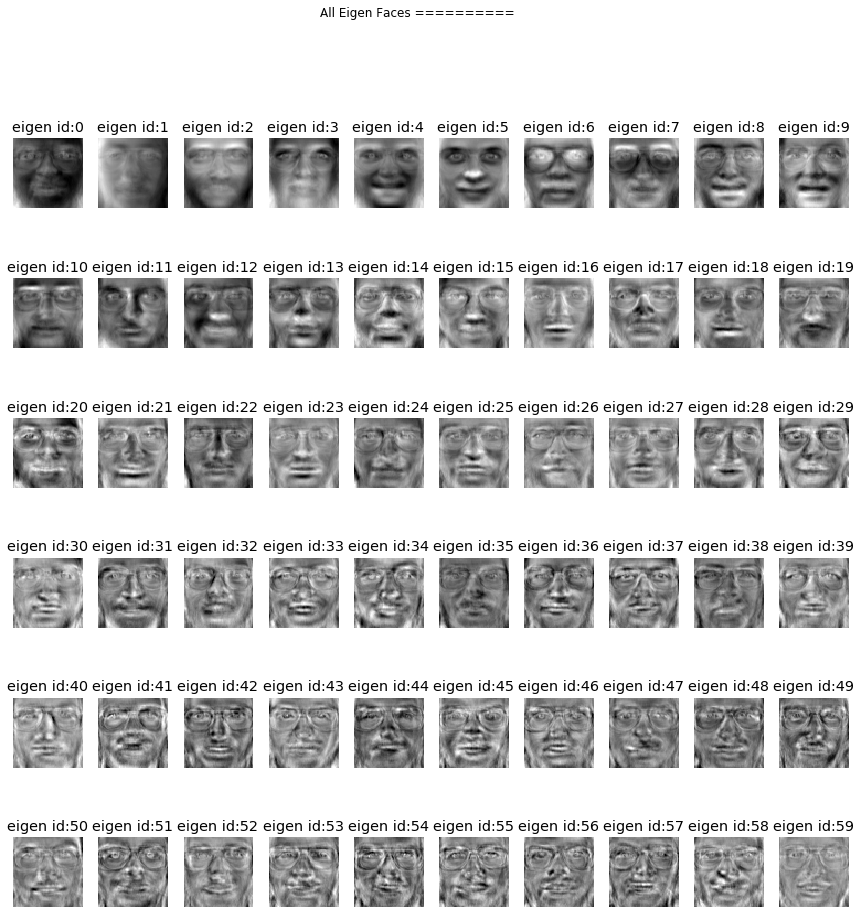

In [19]:
n=60
n_components_function(n)